In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler 

In [3]:
# Load the data
df = pd.read_csv('student-scores.csv')
print(df.head())

   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

In [4]:
# Drop the columns that are not needed
df = pd.DataFrame(df)
obselete_columns = ['id','first_name','last_name','email','gender', 'career_aspiration']
df.drop(obselete_columns, axis=1, inplace=True)
print(df.head())

df = pd.get_dummies(df, columns=['part_time_job', 'extracurricular_activities'], prefix=['part_time_job', 'extracurricular_activities'], dtype=int, )
print(df.head())

obselete_columns = ['part_time_job_False','extracurricular_activities_False']
df.drop(obselete_columns, axis=1, inplace=True)


   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours  math_score  history_score  physics_score  \
0                       27          73             81             93   
1                       47          90             86             96   
2                       13          81             97             95   
3                        3          71             74             88   
4                       10          84             77             65   

   chemistry_score  biology_score  english_score  geography_score  
0               97             63             80               87  
1              100             90             88          

In [5]:
df = df.explode(['weekly_self_study_hours'])

# Convert the 'weekly_self_study_hours' column to integer
df['weekly_self_study_hours'] = df['weekly_self_study_hours'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else x).astype(np.int64)
df['extracurricular_activities_True'] = df['extracurricular_activities_True'].astype('int64')
# Save the modified data
df.to_csv('modified_student_scores.csv', index=False)

In [6]:
#initialise the independent variables

part_time_job = df['part_time_job_True'].values
weekly_self_study_hours = df['weekly_self_study_hours'].values
missing_days = df['absence_days'].values
extracurricular_activities = df['extracurricular_activities_True'].values

In [7]:
#intialise the dependent variables
math_score = df['math_score'].values
history_score = df['history_score'].values
physics_score = df['physics_score'].values
chemistry_score = df['chemistry_score'].values
biology_score = df['biology_score'].values
english_score = df['english_score'].values
geography_score = df['geography_score'].values


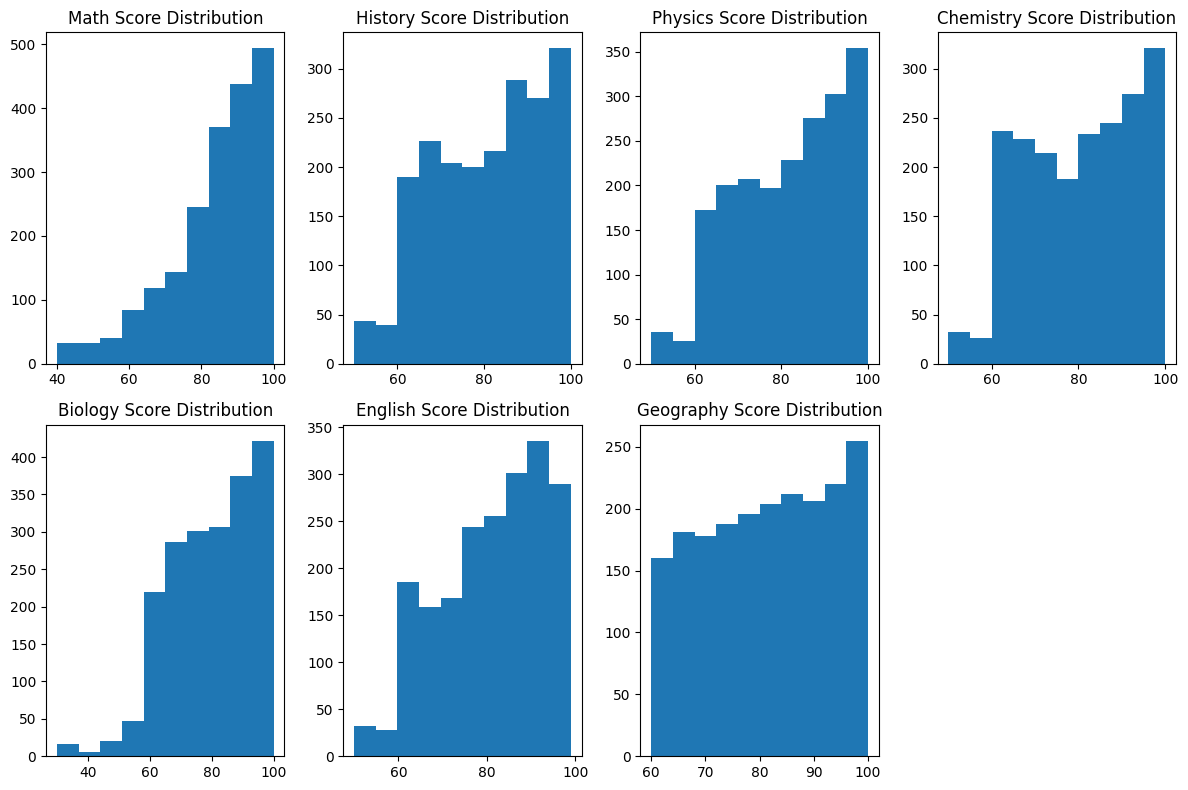

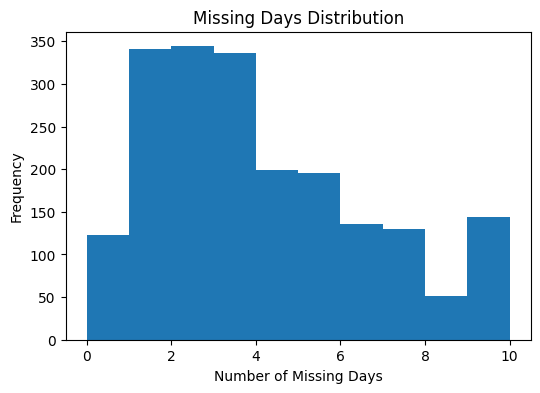

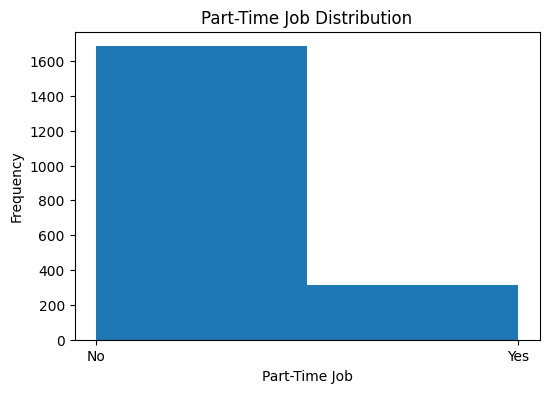

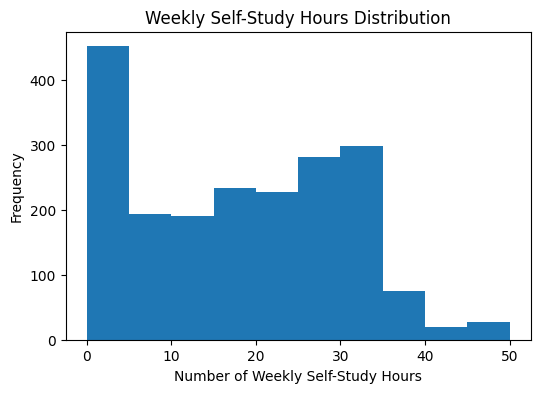

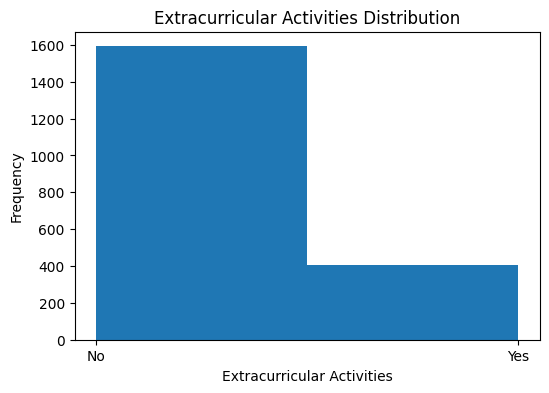

In [8]:

# Calculate the distribution of scores
math_score_dist = np.histogram(math_score, bins=10)
history_score_dist = np.histogram(history_score, bins=10)
physics_score_dist = np.histogram(physics_score, bins=10)
chemistry_score_dist = np.histogram(chemistry_score, bins=10)
biology_score_dist = np.histogram(biology_score, bins=10)
english_score_dist = np.histogram(english_score, bins=10)
geography_score_dist = np.histogram(geography_score, bins=10)

# Plot the distribution of scores
plt.figure(figsize=(12, 8))
plt.subplot(2, 4, 1)
plt.hist(math_score, bins=10)
plt.title('Math Score Distribution')

plt.subplot(2, 4, 2)
plt.hist(history_score, bins=10)
plt.title('History Score Distribution')

plt.subplot(2, 4, 3)
plt.hist(physics_score, bins=10)
plt.title('Physics Score Distribution')

plt.subplot(2, 4, 4)
plt.hist(chemistry_score, bins=10)
plt.title('Chemistry Score Distribution')

plt.subplot(2, 4, 5)
plt.hist(biology_score, bins=10)
plt.title('Biology Score Distribution')

plt.subplot(2, 4, 6)
plt.hist(english_score, bins=10)
plt.title('English Score Distribution')

plt.subplot(2, 4, 7)
plt.hist(geography_score, bins=10)
plt.title('Geography Score Distribution')

plt.tight_layout()
plt.show()
